<a href="https://colab.research.google.com/github/nehad-ahm/learn-neural-networks/blob/main/mnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Libraries

This notebook was made by following this tutorial: https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/

In [24]:
# Importing Libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

#Getting my handwritten digits
!git clone https://github.com/nehad-ahm/learn-neural-networks

# Initialising test and train data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

# Normalising pixel values
x_train = x_train/255
x_test = x_test/255

fatal: destination path 'learn-neural-networks' already exists and is not an empty directory.
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


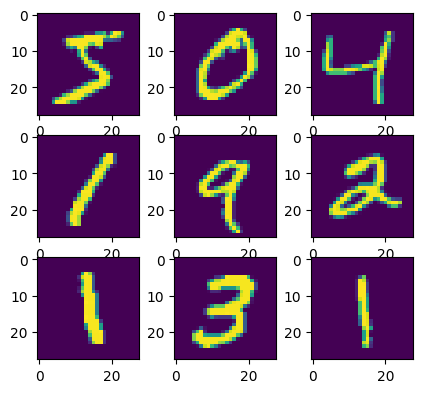

In [25]:
# Plotting the first few digits from the dataset
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(5,4.5))
axs = axs.flatten()
for i in np.arange(len(axs)):
  ax = axs[i]
  ax.imshow(x_train[i])

### Developing Baseline Model

It is ideal to develop a modular test harness for the baseline model, which makes modifying different aspects easier later on.

Here we design a test harness with five key elements - loading the dataset, preparing the dataset, defining the model, evaluating the model, and presenting the results.

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [27]:
def load_dataset():
  # load dataset
  (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

  # one-hot encoding the target values
  y_train = to_categorical(y_train)
  y_test = to_categorical(y_test)
  return x_train, y_train, x_test, y_test

def prep_pixels(train, test):
  norm_factor = 255.0
  return train/norm_factor, test/norm_factor

def define_model():
  '''The model we're making has two main aspects - the feature extraction
  front comprised of covolutional and pooling layers, adn the classifier
  backend that makes predictions'''
  model = Sequential()
  model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=(28,28,1)))
  model.add(MaxPooling2D((2,2)))
  model.add(Flatten())
  model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))
  model.summary()
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

def evaluate_model(x_data, y_data, n_folds=5):
  '''This function will evaluate out model using 5-fold cross validation'''
  scores, histories = [], []
  # prepare cross-validation
  kfold = KFold(n_folds, shuffle=True, random_state=1)
  for train_ix, test_ix in kfold.split(x_data):
    # define model
    model = define_model()
    # select rows for trian and test
    x_train, y_train, x_test, y_test = x_data[train_ix], y_data[train_ix], x_data[test_ix], y_data[test_ix]
    # fit model
    history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))
    # evaluate model
    _, acc = model.evaluate(x_test, y_test, verbose=0)
    print('> %.3f' % (acc * 100.0))
    # store scores
    scores.append(acc)
    histories.append(history)
  return scores, histories

def summarize_diagnostics(histories):
  plt.figure(figsize=(10,5))
  for i in range(len(histories)):
    # plot loss
    plt.subplot(2,1,1)
    plt.title('Cross Entropy Loss')
    plt.plot(histories[i].history['loss'], label='train', color='blue')
    plt.plot(histories[i].history['val_loss'], label='test', color='orange')
    plt.grid()

    #plot accuracy
    plt.subplot(2,1,2)
    plt.title('Classification Accuracy')
    plt.plot(histories[i].history['accuracy'], label='train', color='blue')
    plt.plot(histories[i].history['val_accuracy'], label='test', color='orange')
    plt.grid()
  plt.show()

# summarize model performance
def summarize_performance(scores):
	# print summary
	print('Accuracy: mean=%.3f std=%.3f, n=%d' % (np.mean(scores)*100, np.std(scores)*100, len(scores)))
	# box and whisker plots of results
	plt.boxplot(scores)
	plt.show()

In [28]:
def run_test_harness():
  # load dataset
  x_train, y_train, x_test, y_test = load_dataset()
  # prep pixel data
  x_train, x_test = prep_pixels(x_train, x_test)
  # evaluate model
  scores, histories = evaluate_model(x_train, y_train)
  # learning curves
  summarize_diagnostics(histories)
  #summarize performace
  summarize_performance(scores)

In [29]:
x_train, y_train, x_test, y_test = load_dataset()
x_train, x_test = prep_pixels(x_train, x_test)
scores, histories = evaluate_model(x_train, y_train)

summarize_diagnostics(histories)
summarize_performance(scores)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 100)            │       540,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 542,230 (2.07 MB)

 Trainable params: 542,230 (2.07 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9085 - loss: 0.2954 - val_accuracy: 0.9776 - val_loss: 0.0738
Epoch 2/10
 805/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9840 - loss: 0.0499

KeyboardInterrupt: 

Here we now make a model of our own

In [ ]:
def run_test_harness():
  # load dataset
  x_train, y_train, x_test, y_test = load_dataset()
  # prep pixel data
  x_train, x_test = prep_pixels(x_train, x_test)
  # define model
  model = define_model()
  # fit model
  history = evaluate_model(x_train, y_train)
  # learning curves
  summarize_diagnostics(histories)

def define_model():
  '''The model we're making has two main aspects - the feature extraction
  front comprised of covolutional and pooling layers, adn the classifier
  backend that makes predictions'''
  model = Sequential()
  model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=(28,28,1)))
  model.add(MaxPooling2D((2,2)))
  model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform'))
  model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform'))
  model.add(MaxPooling2D((2,2)))
  model.add(Flatten())

  model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(50, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))

  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
x_train, y_train, x_test, y_test = load_dataset()

x_train, x_test = prep_pixels(x_train, x_test)

model = define_model()

history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.05)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.legend(['loss', 'val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

model.save('my_model-2.h5')

In [ ]:
model = tf.keras.models.load_model('my_model-2.h5')
y_prob = model.predict(x_test)
y_pred = np.argmax(y_prob, axis=1)

print(y_pred[1])
y_pred = to_categorical(y_pred)

print(y_pred[0])
print(y_test[0])

In [ ]:
count = 0
for i in range(len(y_pred)):
  if (y_pred[i] == y_test[i]).all():
    count += 1

print('Percentage of test set correctly categorised:', 100*count/len(y_pred))

In [ ]:
from PIL import Image
img = []

path_to_images = '/content/learn-neural-networks/my-numbers-handwritten'

for i in np.arange(1,17):
  image = Image.open(f'{path_to_images}/test_numbers_{i:02}.png')
  image = image.resize((28,28))
  image = image.convert('L')
  image.save(f'{path_to_images}/test_numbers_{i:02}.png')
  img.append(np.asarray(image)/256)

img = 1 - np.asarray(img)
for image in img:
  image = np.ndarray.flatten(image)

#mypred = model.predict(img)
#mypred = mypred.argmax(axis=1)
#print(np.argmax(mypred, axis=1))

In [ ]:
preds = []
for i in range(len(mypred)):
  lis = mypred[i]
  index_of_highest = np.argmax(lis) #lis.index(max(lis))
  preds.append(index_of_highest)

print(preds)

In [ ]:
mypred = model.predict(img)
mypred = mypred.argmax(axis=1)
print(mypred.reshape(4,4))

fig, axs = plt.subplots(nrows=4, ncols = 4, figsize=(10,7))
axs = axs.flatten()
for i in np.arange(16):
  ax = axs[i]
  ax.imshow(img[i])
  #ax.title('Predicted:' + str(y_pred[i]))

### Final Nice Try

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

def define_model():
  '''The model we're making has two main aspects - the feature extraction
  front comprised of covolutional and pooling layers, adn the classifier
  backend that makes predictions'''
  model = Sequential()
  model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=(28,28,1)))
  model.add(AveragePooling2D((2,2)))
  model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform'))
  model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform'))
  model.add(AveragePooling2D((2,2)))
  model.add(Flatten())

  model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(50, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))

  model.summary()
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

def load_data():
  (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
  x_train = x_train/255
  x_test = x_test/255

  return x_train, y_train, x_test, y_test

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 13, 13, 32)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 9, 9, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 4, 4, 64)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 100)            │       102,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 163,804 (639.86 KB)

 Trainable params: 163,804 (639.86 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.9141 - loss: 0.2789 - val_accuracy: 0.9837 - val_loss: 0.0567
Epoch 2/10
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9858 - loss: 0.0457 - val_accuracy: 0.9913 - val_loss: 0.0328
Epoch 3/10
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9908 - loss: 0.0305 - val_accuracy: 0.9917 - val_loss: 0.0265
Epoch 4/10
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9925 - loss: 0.0229 - val_accuracy: 0.9933 - val_loss: 0.0311
Epoch 5/10
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9943 - loss: 0.0181 - val_accuracy: 0.9913 - val_loss: 0.0309
Epoch 6/10
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9951 - loss: 0.0159 - val_accuracy: 0.9927 - val_loss: 0.0317
Epoch 7/10
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9960 - loss: 0.0121 - val_accuracy: 0.9920 - val_loss: 0.0273
Epoch 8/10
1782/1782 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9972 - loss: 0.0094 

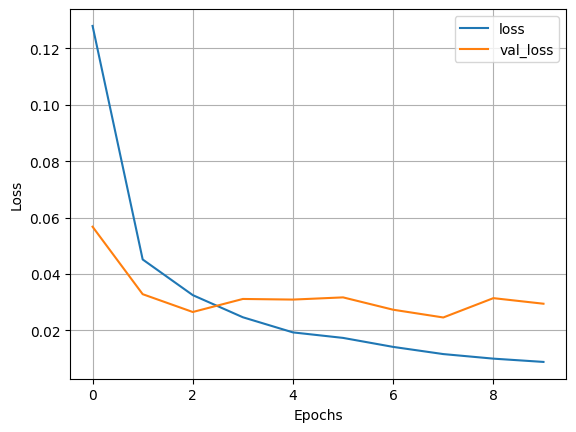

In [35]:
x_train, y_train, x_test, y_test = load_data()

#Training the model and storing training history
model = define_model()

model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_split=0.05, batch_size=32)
model.save('my_model-1.h5')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.legend(['loss', 'val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [36]:
y_prob = model.predict(x_test)
y_pred = np.argmax(y_prob, axis=1)

count = 0
for i in range(len(y_test)):
  if y_pred[i] == y_test[i]: count += 1

print('Percentage of numbers identified correctly in test set:', 100*count/len(y_test))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Percentage of numbers identified correctly in test set: 99.34


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[[1 6 2 3]
 [4 5 6 7]
 [8 9 8 7]
 [9 4 3 2]]


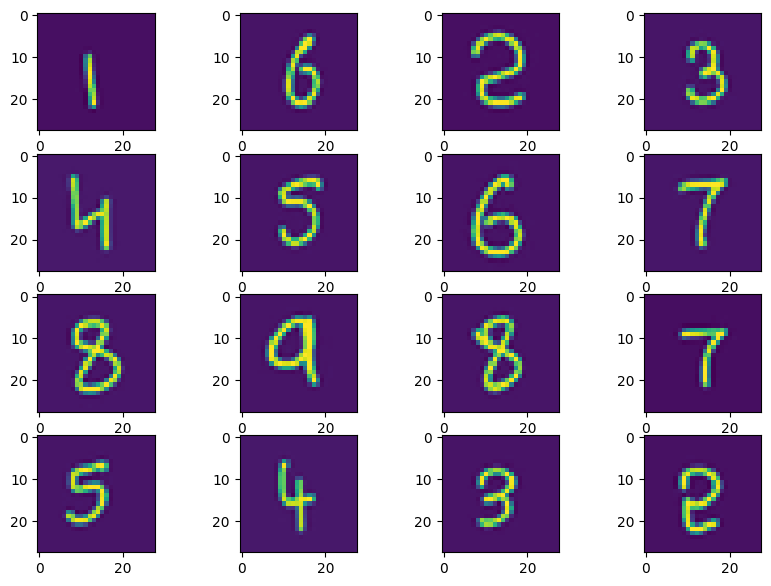

In [37]:
from PIL import Image
img = []

path_to_images = '/content/learn-neural-networks/my-numbers-handwritten'

for i in np.arange(1,17):
  image = Image.open(f'{path_to_images}/test_numbers_{i:02}.png')
  image = image.resize((28,28))
  image = image.convert('L')
  image.save(f'{path_to_images}/test_numbers_{i:02}.png')
  img.append(np.asarray(image)/256)

img = 1 - np.asarray(img)
for image in img:
  image = np.ndarray.flatten(image)

mypred = model.predict(img)
mypred = mypred.argmax(axis=1)
print(mypred.reshape(4,4))

fig, axs = plt.subplots(nrows=4, ncols = 4, figsize=(10,7))
axs = axs.flatten()
for i in np.arange(16):
  ax = axs[i]
  ax.imshow(img[i])
  #ax.title('Predicted:' + str(y_pred[i]))